In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('position_salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
df = pd.concat([pd.Series(1, index = df.index, name='00'), df], axis = 1)
df.head()

,00,Position,Level,Salary
0,1,Business Analyst,1,45000
1,1,Junior Consultant,2,50000
2,1,Senior Consultant,3,60000
3,1,Manager,4,80000
4,1,Country Manager,5,110000


In [4]:
df = df.drop(columns='Position')

In [5]:
y = df['Salary']
X = df.drop(columns = 'Salary')
X.head()

,00,Level
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [6]:
X['Level1'] = X['Level']**2
X['Level2'] = X['Level']**3
X.head()

,00,Level,Level1,Level2
0,1,1,1,1
1,1,2,4,8
2,1,3,9,27
3,1,4,16,64
4,1,5,25,125


In [7]:
m = len(X)
X = X/X.max()

In [8]:
X

,00,Level,Level1,Level2
0,1.0,0.1,0.01,0.001
1,1.0,0.2,0.04,0.008
2,1.0,0.3,0.09,0.027
3,1.0,0.4,0.16,0.064
4,1.0,0.5,0.25,0.125
5,1.0,0.6,0.36,0.216
6,1.0,0.7,0.49,0.343
7,1.0,0.8,0.64,0.512
8,1.0,0.9,0.81,0.729
9,1.0,1.0,1.00,1.000


In [9]:
def hypothesis(X, theta):
    y1 = theta * X
    return np.sum(y1, axis = 1)

In [10]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return sum(np.sqrt((y1-y)**2)) / (2 * m)

In [11]:
def gradientDescent(X, y, theta, alpha, epoch):
    J = []
    k = 0
    while k < epoch:
        y1 = hypothesis(X, theta)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)* X.iloc[:, c])/m
        j = cost(X, y, theta)
        J.append(j)
        k += 1
    return J, theta

In [12]:
theta = np.array([0.0]*len(X.columns))
J, theta = gradientDescent(X, y, theta, 0.05, 700)

In [13]:
y_hat = hypothesis(X, theta)

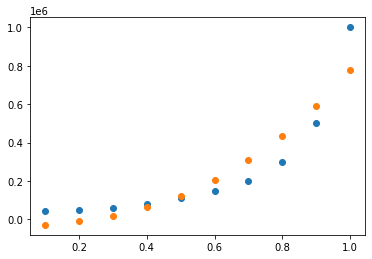

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=X['Level'],y= y)           
plt.scatter(x=X['Level'], y=y_hat)
plt.show()

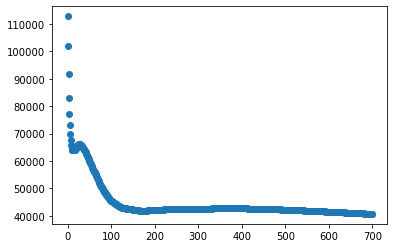

In [15]:
plt.figure()
plt.scatter(x=list(range(0, 700)), y=J)
plt.show()